In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
df=pd.read_csv('dataset/preprocessed_dataset.csv')
df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
6361,Kelly Fremon Craig,Rachel McAdams,Abby Ryder Fortson,Benny Safdie,Drama Comedy,"are you there god? it's me, margaret",Rachel McAdams Abby Ryder Fortson Benny Safdie...
6362,Josh Gordon & Will Speck,Anthony Ramos,Naomi Scott,Zachary Quinto,Science Fiction Comedy Romance,distant,Anthony Ramos Naomi Scott Zachary Quinto Josh ...
6363,Olivia Wilde,Florence Pugh,Harry Styles,Olivia Wilde,Drama Mystery Thriller,don't worry darling,Florence Pugh Harry Styles Olivia Wilde Olivia...
6364,Nicholas Stoller,Billy Eichner,Luke Macfarlane,Ts Madison,Adventure Comedy Family Science Fiction,bros,Billy Eichner Luke Macfarlane Ts Madison Nicho...


In [17]:
for i, genre in enumerate(df['genres']): # genres has a few attributes so we have to splite each genre
    df['genres'][i] = str(genre).split()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer()
vectors = cv.fit_transform(df['comb'].astype('U'))
target = vectors[1588] # 1588 is toy story's index in the dataset

In [20]:
# Cosine Similarity

result = cosine_similarity(vectors,target)

similarities = [0] * len(result)
for i in range(len(result)):
    similarities[i] = result[i][0]


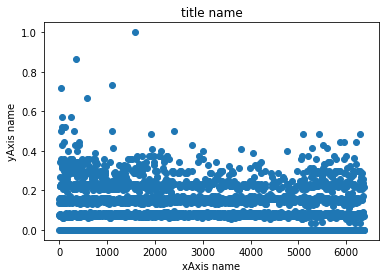

In [38]:
# data = []
# for i in range(len(df['movie_title'])):
#     data.append([df['movie_title'][i],similarities[i]])

x_num = np.arange(len(df['movie_title']))
plt.scatter(x_num,similarities)
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()


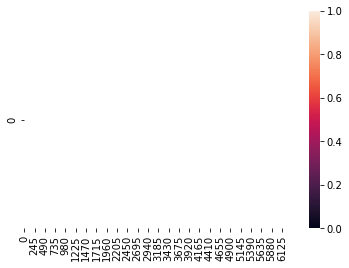

In [37]:
# uniform_data = [similarities]
# ax = sns.heatmap(uniform_data, linewidth=0.01)
# plt.show()

In [ ]:
# getting top 20 movies that have high similarities
max = 0
top_20_similarities = [0] * 21
indexes_of_top_20 = [0] * 21
for i in range(21):
    for j in range(len(similarities)):
        if similarities[max] < similarities[j]:
            max = j
    indexes_of_top_20[i] = max
    top_20_similarities[i] = similarities[max]
    similarities[max] = 0.0
print(indexes_of_top_20)
print(top_20_similarities) # the first index is the same movie

[1588, 353, 1095, 43, 583, 56, 238, 67, 119, 41, 298, 1111, 2393, 5424, 1913, 5106, 6294, 416, 5956, 6211, 91]
[0.9999999999999998, 0.8666666666666665, 0.7333333333333332, 0.7161148740394329, 0.6666666666666665, 0.5728918992315463, 0.5728918992315463, 0.521749194749951, 0.521749194749951, 0.501280411827603, 0.501280411827603, 0.501280411827603, 0.501280411827603, 0.483045891539648, 0.48304589153964794, 0.48304589153964794, 0.48304589153964794, 0.447213595499958, 0.447213595499958, 0.447213595499958, 0.4472135954999579]


In [ ]:
# retrieving movie title for top_20
top_20_movie_titles = ['NA'] * 20

for i in range(20):
    top_20_movie_titles[i] = df['movie_title'][indexes_of_top_20[i+1]] # first index is the same movie
       
print(top_20_movie_titles)

['toy story 2', "a bug's life", 'toy story 3', 'cars', 'brave', 'monsters, inc.', 'up', 'ratatouille', 'cars 2', "the emperor's new groove", 'the ant bully', 'big', 'toy story 4', 'rugrats go wild', 'sherlock gnomes', "chip 'n dale: rescue rangers", 'last action hero', 'wish dragon', 'the ice age adventures of buck wild', 'the polar express']
